## Import Statements

In [5]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Read In Data

In [6]:
np.set_printoptions(threshold=np.inf)  # prints a full matrix rather than an abbreviated matrix
np.random.seed(0)

# define data and destination paths
dest_path = "/Users/Alliot/Documents/CLA-Project/Data/all-data-no-na/neural-network/"
data_path_hourly = "/Users/Alliot/Documents/CLA-Project/Data/hourly-data-sets/"

X_2015 = np.load(data_path_hourly + 'hourly_X_2015.npy')
X_2016 = np.load(data_path_hourly + 'hourly_X_2016.npy')
X_2017 = np.load(data_path_hourly + 'hourly_X_2017.npy')
X_2018 = np.load(data_path_hourly + 'hourly_X_2018.npy')

y_2015 = np.load(data_path_hourly + 'hourly_y_2015.npy')
y_2016 = np.load(data_path_hourly + 'hourly_y_2016.npy')
y_2017 = np.load(data_path_hourly + 'hourly_y_2017.npy')
y_2018 = np.load(data_path_hourly + 'hourly_y_2018.npy')

loc_2014 = np.load(data_path_hourly + 'hourly_locations_2014.npy')
loc_2015 = np.load(data_path_hourly + 'hourly_locations_2015.npy')
loc_2016 = np.load(data_path_hourly + 'hourly_locations_2016.npy')
loc_2017 = np.load(data_path_hourly + 'hourly_locations_2017.npy')
loc_2018 = np.load(data_path_hourly + 'hourly_locations_2018.npy')

X = X_2018.astype(float)
y = y_2018
locations = loc_2018
#X = np.vstack((X_2015, X_2016, X_2017, X_2018)).astype(float)
#y = np.hstack((y_2015, y_2016, y_2017, y_2018))
#locations = np.hstack((loc_2015, loc_2016, loc_2017, loc_2018))

num_features = X.shape[1]

# manipulate data set. labels are converted to 0, +1 for binary classification; samples are removed uniformly 
# from the data set so that the disproportionately large number of negative samples (no algae) does 
# not bias the model.

num_alg = 0  # count the number of algae instances
num_no_alg = 0  # count the number of no algae instances

# Convert labels to binary: 0 for no algae and 1 for algae
for i in range(0, len(y)):
    if y[i] == 0:
        num_no_alg += 1
    if y[i] == 1 or y[i] == 2:
        y[i] = 1
        num_alg += 1

# split dataset by lake locations
loc_dict = {
    'Mendota': 0,
    'Monona': 1,
    'Kegonsa': 2,
    'Wingra': 3,
    'Waubesa': 4
}

# split data set by location
loc = [loc_dict[locations[i]] for i in range(len(locations))]

# define indices that mark the end of each lake location in the data set. Waubesa doesnt need one since it is
# the last location
mendota_idx = loc.count(0)
monona_idx = mendota_idx + loc.count(1)
kegonsa_idx = monona_idx + loc.count(2)
wingra_idx = kegonsa_idx + loc.count(3)

loc = np.asarray(loc)
sort_idx = np.argsort(loc, kind='mergesort')
loc = loc[sort_idx]
X = X[sort_idx, :]
y = y[sort_idx]

# split data
mendota_X = X[:mendota_idx, :]
mendota_y = y[:mendota_idx]

monona_X = X[mendota_idx:monona_idx, :]
monona_y = y[mendota_idx:monona_idx]

kegonsa_X = X[monona_idx:kegonsa_idx, :]
kegonsa_y = y[monona_idx:kegonsa_idx]

wingra_X = X[kegonsa_idx:wingra_idx, :]
wingra_y = y[kegonsa_idx:wingra_idx]

waubesa_X = X[wingra_idx:, :]
waubesa_y = y[wingra_idx:]

X = mendota_X
y = mendota_y

## PCA

In [7]:
pca_X = X - np.mean(X, axis=0)    # center data

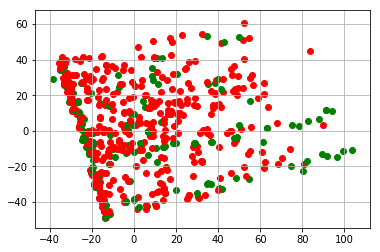

In [8]:
pca = PCA(
    n_components=2,
    svd_solver='auto',
)

pca_trans_X = pca.fit_transform(pca_X)

plt.figure()
for i in range(X.shape[0]):
    if y[i] == 0:
        plt.scatter(pca_trans_X[i, 0], pca_trans_X[i, 1], c='r')
    else:
        plt.scatter(pca_trans_X[i, 0], pca_trans_X[i, 1], c='g')
plt.grid(True)

## KernelPCA

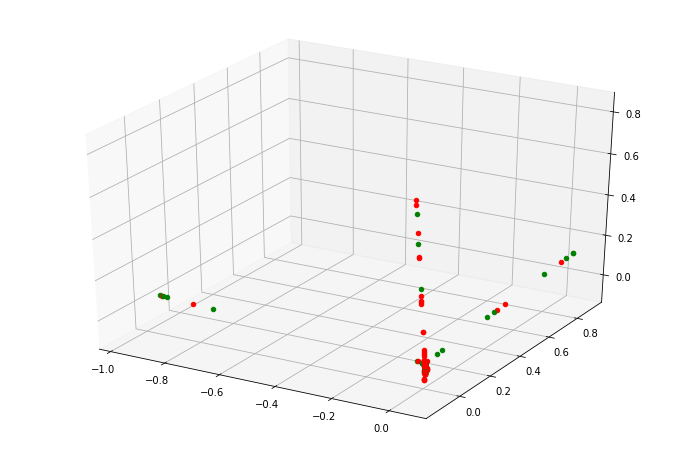

In [36]:
kern_pca = KernelPCA(
    n_components=3,
    kernel='rbf',
#     gamma='auto',
    degree=3,
    coef0=1
)

kern_pca_trans_X = kern_pca.fit_transform(pca_X)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(0, kern_pca_trans_X.shape[0]):
    if y[i] == 0:
        c = 'r'
    else:
        c = 'g'
    ax.scatter(kern_pca_trans_X[i, 0], kern_pca_trans_X[i, 1], kern_pca_trans_X[i, 2], c=c)
plt.grid(True)

## Plot Features

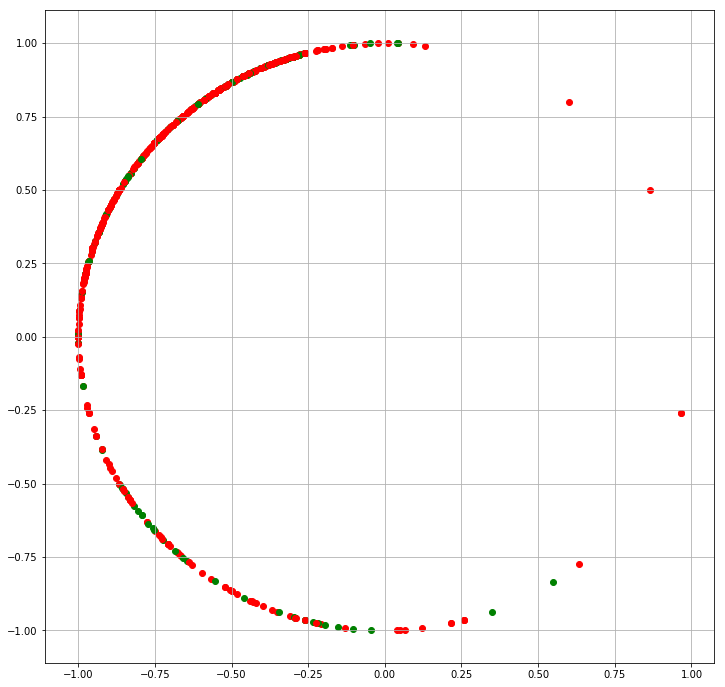

In [12]:
plt.figure(figsize=(12, 12))

for i in range(X.shape[0]):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], c='r')
    else:
        plt.scatter(X[i, 0], X[i, 1], c='g')
        
plt.grid(True)

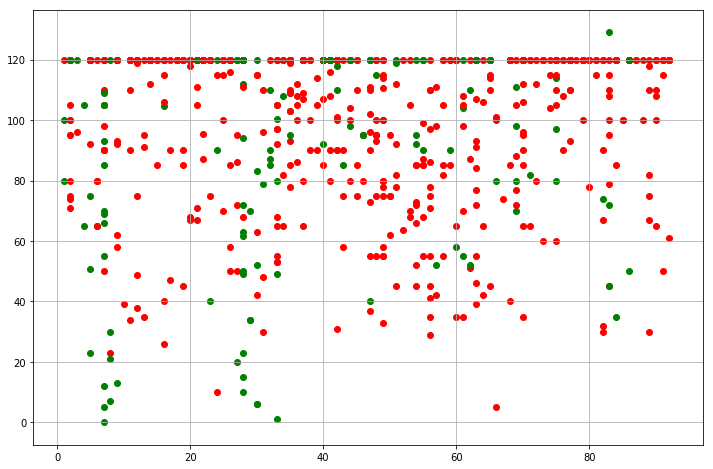

In [10]:
plt.figure(figsize=(12, 8))

feature = 6

for i in range(X.shape[0]):
    if y[i] == 0:
        plt.scatter(X[i, 2], X[i, feature], c='r')
    else:
        plt.scatter(X[i, 2], X[i, feature], c='g')

plt.grid(True)

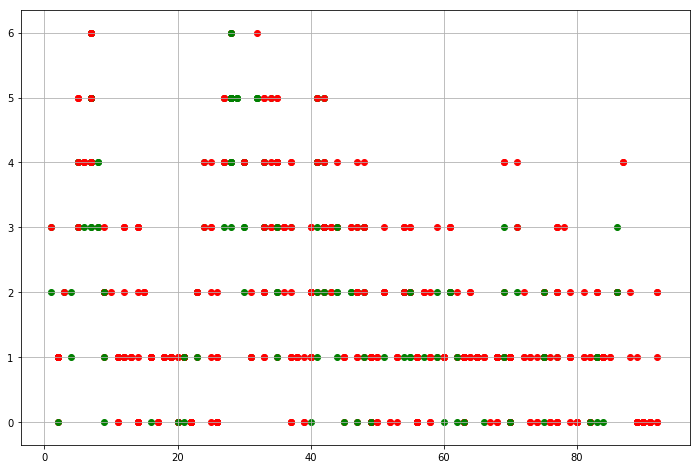

In [11]:
plt.figure(figsize=(12, 8))

feature = 20

for i in range(X.shape[0]):
    if y[i] == 0:
        plt.scatter(X[i, 2], X[i, feature], c='r')
    else:
        plt.scatter(X[i, 2], X[i, feature], c='g')

plt.grid(True)